<a href="https://colab.research.google.com/github/alexanderjireland/ff-draft-optimizer/blob/main/notebooks/ff_projections_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ff_projections import *
import pandas as pd
import numpy as np

In [ ]:
trace, X_test, y_test = split_data_and_train_pm_model('/content/projection_models_data_06_02.csv')

Fitting preprocessing pipeline...
Fitting logistic regression model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.80
Precision: 0.82
Recall: 0.85
Confusion Matrix:
[[274  95]
 [ 78 426]]
Running probabilistic model...
Fitting initial linear regression model to get priors...
Mean of coefficients: [ 1.07983072e+00  1.47647820e+00 -5.51825099e-01 -1.03588792e-01
 -8.19480955e-01 -2.25552696e-01  3.93817247e-01  3.98538614e-01
 -1.41487482e-01  2.51177569e-01  1.44456649e+00 -8.01971030e-01
 -9.85605432e-01  3.56598479e-01  3.01850868e-01  4.85750843e-01
 -3.09765119e-01  2.69531440e-01 -3.83735439e-01 -4.72657216e-01
 -2.60516357e-01 -3.35370134e-01 -3.80627162e-01 -6.16672015e-01
  1.09814743e-01 -1.93342725e-01 -7.15487957e-01 -4.91353427e-01
  8.94319704e-02  1.35742048e+00 -2.66299652e-01 -7.89286080e-01
 -3.24261233e-01  2.00185529e-01  7.84974774e-01 -8.19384309e-01
 -1.27721633e+00  1.48567618e-01 -3.31100684e-01  2.38019624e-01
 -8.26462391e-01  8.43177337e-01  2.61957434e-02 -2.36511216e-01
  3.46710070e-01 -1.29650112e-01  1.66476471e-01 -3.81121361e-01
 -1.64056722e-01 -5.27744

Output()

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
directory = "/content/drive/MyDrive/PyMC_Models"
os.makedirs(directory, exist_ok=True)

Mounted at /content/drive


In [ ]:
save_trace_filepath = "/content/drive/MyDrive/PyMC_Models/full_send_model_06_03.nc"
az.to_netcdf(trace, save_trace_filepath)

'/content/drive/MyDrive/PyMC_Models/full_send_model_06_03.nc'

In [ ]:
# Load in trace
save_trace_filepath = "/content/drive/MyDrive/PyMC_Models/full_send_model_06_03.nc"
trace = az.from_netcdf(save_trace_filepath)

array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

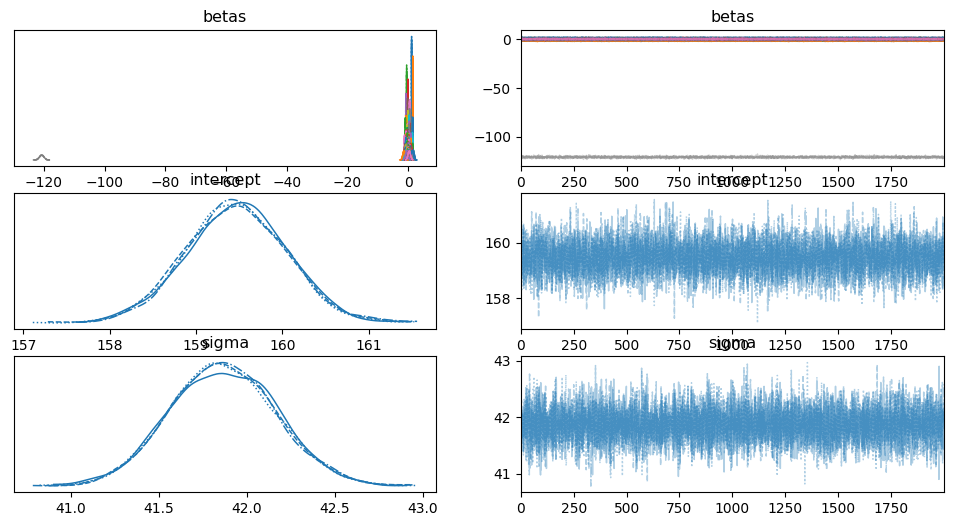

In [ ]:
az.plot_trace(trace)

In [ ]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],1.080,0.030,1.023,1.136,0.000,0.000,14900.0,6279.0,1.0
betas[1],1.476,0.035,1.413,1.544,0.000,0.000,12994.0,5540.0,1.0
betas[2],-0.552,0.041,-0.630,-0.476,0.000,0.001,14629.0,5749.0,1.0
betas[3],-0.104,0.046,-0.191,-0.020,0.000,0.001,16363.0,5598.0,1.0
betas[4],-0.819,0.054,-0.920,-0.716,0.000,0.001,13755.0,5930.0,1.0
...,...,...,...,...,...,...,...,...,...
betas[125],0.266,0.393,-0.467,1.023,0.003,0.005,16708.0,6162.0,1.0
betas[126],0.300,0.394,-0.433,1.053,0.003,0.005,15756.0,5878.0,1.0
betas[127],-120.703,0.720,-121.980,-119.269,0.009,0.007,7017.0,6266.0,1.0
intercept[0],159.468,0.582,158.324,160.512,0.007,0.006,7232.0,6450.0,1.0


PC1             68.012084
PC2             -0.019538
PC3            -11.473354
PC4             13.070029
PC5             28.089067
                  ...    
PC124           -4.553537
PC125            1.381015
PC126           -2.239772
PC127           -2.095985
is_draftable     0.000000
Name: 0, Length: 128, dtype: float64
fantasy_pts    0.0
Name: 3865, dtype: float64
Projected season points (median): 215.0
95% credible interval: [130.8, 297.5]
90% credible interval: [143.6, 283.8]
85% credible interval: [153.5, 276.4]
75% credible interval: [164.8, 263.6]
50% credible interval: [186.0, 243.5]
Probability points > 200: 63.70%


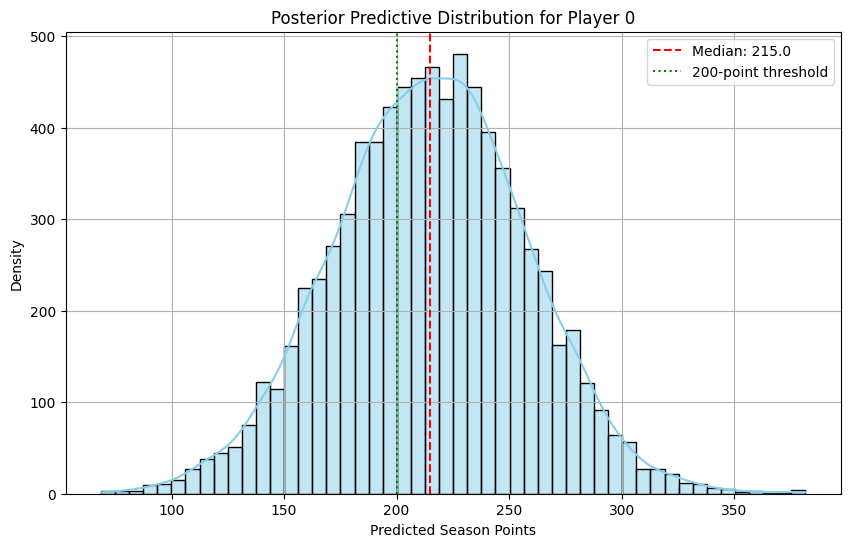

In [ ]:
predict_player(0, trace, X_test, y_test)

PC1             42.406856
PC2             14.959529
PC3             -4.045227
PC4              9.648118
PC5             20.094513
                  ...    
PC124           -1.611975
PC125            2.265978
PC126           -0.021827
PC127            1.498882
is_draftable     0.000000
Name: 350, Length: 128, dtype: float64
fantasy_pts    257.36
Name: 9907, dtype: float64
Projected season points (median): 243.3
95% credible interval: [161.8, 326.6]
90% credible interval: [174.8, 311.3]
85% credible interval: [183.5, 303.0]
75% credible interval: [195.0, 290.8]
50% credible interval: [215.1, 271.6]
Probability points > 200: 85.04%


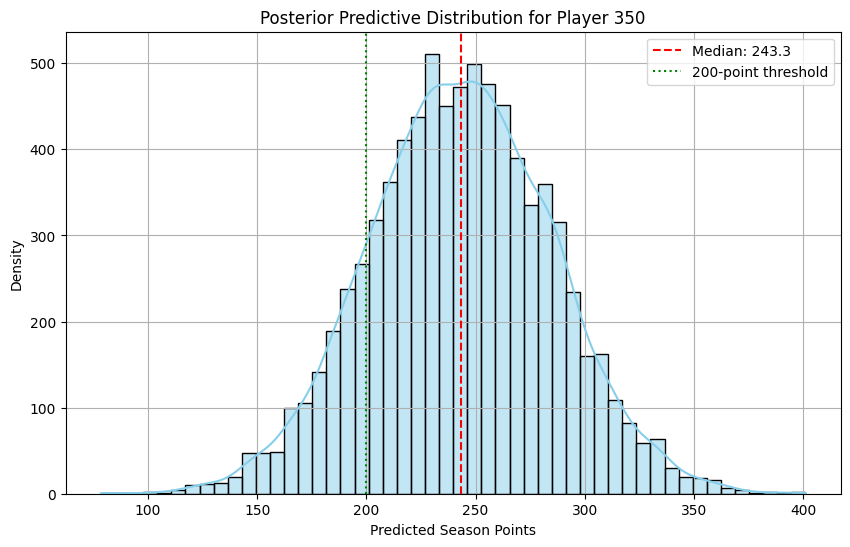

In [ ]:
predict_player(350, trace, X_test, y_test)

PC1              0.104425
PC2             18.301917
PC3            -22.664682
PC4             -1.576018
PC5             13.184499
                  ...    
PC124            2.097275
PC125           -0.901057
PC126            2.004975
PC127           -2.139627
is_draftable     0.000000
Name: 399, Length: 128, dtype: float64
fantasy_pts    152.6
Name: 10076, dtype: float64
Projected season points (median): 214.3
95% credible interval: [129.3, 298.7]
90% credible interval: [143.6, 285.2]
85% credible interval: [152.1, 276.4]
75% credible interval: [165.3, 263.7]
50% credible interval: [185.4, 242.7]
Probability points > 200: 63.06%


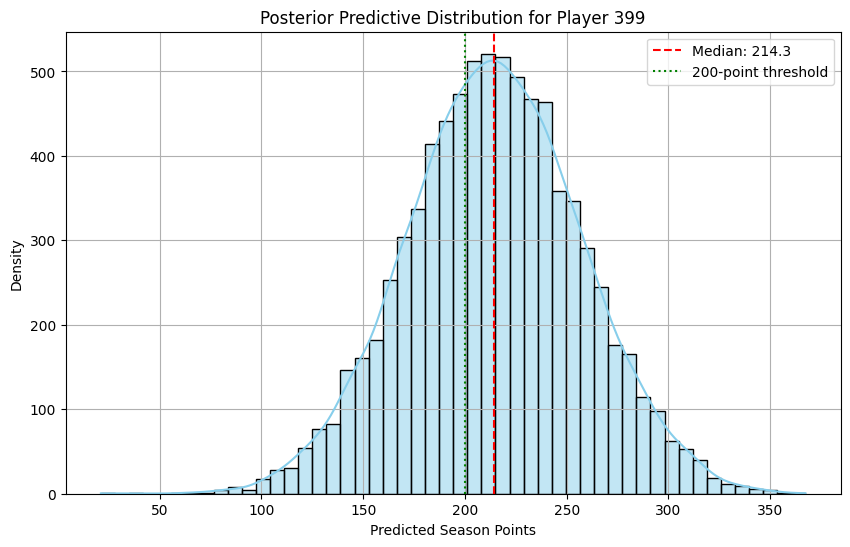

In [ ]:
predict_player(399, trace, X_test, y_test)

In [ ]:
pm_train, pm_test = read_in_data_for_projections(filepath='/content/projection_models_data_06_02.csv')

In [ ]:
pm_test = pm_test.reset_index(drop=True)

In [ ]:
pm_test.sample(20)

,season,gsis_id,full_name_all_players,fantasy_pts,ff_pts_prev_year,years_exp,Rank,ESPN,AVG,position_rank,...,significant_injury_prev_season,cum_player_mean_prev_season,cum_player_std_prev_season,cum_player_min_prev_season,cum_player_noninjured_min_prev_season,cum_player_max_prev_season,position_QB,position_RB,position_TE,position_WR
170,2023,00-0034869,Sam Darnold,5.92,85.40,5.0,NaN,NaN,NaN,NaN,...,0.0,143.860000,39.228824,85.40,85.40,189.16,True,False,False,False
838,2024,00-0039855,Jalen McMillan,116.40,NaN,0.0,306.0,NaN,275.5,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True
317,2023,00-0034983,Hunter Renfrow,48.50,59.70,4.0,219.0,178.0,224.8,72.0,...,1.0,141.750000,75.262851,59.70,NaN,242.20,False,False,False,True
553,2024,00-0038090,Skyy Moore,0.00,53.70,2.0,309.0,248.0,280.5,100.0,...,0.0,48.550000,7.283200,43.40,43.40,53.70,False,False,False,True
769,2023,00-0034351,Dallas Goedert,134.90,130.60,5.0,62.0,62.0,63.8,7.0,...,0.0,129.420000,28.252823,90.40,90.40,165.00,False,False,True,False
445,2024,00-0036620,Dee Eskridge,7.40,0.50,3.0,675.0,NaN,518.0,218.0,...,1.0,14.200000,13.904316,0.50,NaN,28.30,False,False,False,True
619,2023,00-0038122,Desmond Ridder,161.50,22.86,1.0,262.0,NaN,250.0,32.0,...,0.0,22.860000,NaN,22.86,22.86,22.86,True,False,False,False
767,2023,00-0034613,Tanner Hudson,77.10,23.20,5.0,NaN,NaN,NaN,NaN,...,0.0,11.633333,10.094718,4.60,4.60,23.20,False,False,True,False
581,2023,00-0037545,Rashid Shaheed,134.10,93.40,1.0,270.0,NaN,259.7,84.0,...,0.0,93.400000,NaN,93.40,93.40,93.40,False,False,False,True
169,2024,00-0034844,Saquon Barkley,355.30,199.50,6.0,9.0,10.0,9.2,4.0,...,1.0,211.583333,126.736978,15.40,NaN,385.80,False,True,False,False


In [ ]:
filepath = '/content/drive/MyDrive/PyMC_Models/full_send_model_06_03_predictions.csv'
df = create_probabilistic_predictions(trace, pm_test, X_test, save_to_csv=True, filepath=filepath)
df

,player_name,median_prediction,credible_interval_95_lower,credible_interval_95_upper,credible_interval_85_lower,credible_interval_85_upper,probability_gt_300,probability_gt_200
0,Aaron Rodgers,215.694539,128.508646,301.033387,152.327650,278.088614,0.025500,0.640250
1,Aaron Rodgers,195.732058,109.979080,283.140008,131.747954,260.223523,0.009375,0.463000
2,Joe Flacco,6.793550,-74.964922,90.838481,-54.054604,67.845911,0.000000,0.000000
3,Joe Flacco,21.271974,-59.454011,102.952826,-37.982244,81.608450,0.000000,0.000000
4,Matthew Stafford,215.839311,131.520861,298.512370,154.710919,276.315805,0.022625,0.643000
...,...,...,...,...,...,...,...,...
868,Nikko Remigio,29.043460,-51.332596,111.761199,-32.010196,90.431172,0.000000,0.000000
869,Chris Collier,12.211436,-70.329739,94.036612,-49.754950,73.533252,0.000000,0.000000
870,Keon Coleman,155.372848,73.271631,236.905059,94.945974,214.928698,0.000125,0.136875
871,Jalen Coker,26.796528,-56.263362,109.622554,-34.241251,86.997912,0.000000,0.000000


In [ ]:
test_df = df.merge(pm_test[['fantasy_pts']], left_index=True, right_index=True)
test_df

,player_name,median_prediction,credible_interval_95_lower,credible_interval_95_upper,credible_interval_85_lower,credible_interval_85_upper,probability_gt_300,probability_gt_200,fantasy_pts
0,Aaron Rodgers,215.694539,128.508646,301.033387,152.327650,278.088614,0.025500,0.640250,0.00
1,Aaron Rodgers,195.732058,109.979080,283.140008,131.747954,260.223523,0.009375,0.463000,231.62
2,Joe Flacco,6.793550,-74.964922,90.838481,-54.054604,67.845911,0.000000,0.000000,100.84
3,Joe Flacco,21.271974,-59.454011,102.952826,-37.982244,81.608450,0.000000,0.000000,84.48
4,Matthew Stafford,215.839311,131.520861,298.512370,154.710919,276.315805,0.022625,0.643000,243.10
...,...,...,...,...,...,...,...,...,...
868,Nikko Remigio,29.043460,-51.332596,111.761199,-32.010196,90.431172,0.000000,0.000000,0.00
869,Chris Collier,12.211436,-70.329739,94.036612,-49.754950,73.533252,0.000000,0.000000,0.60
870,Keon Coleman,155.372848,73.271631,236.905059,94.945974,214.928698,0.000125,0.136875,105.50
871,Jalen Coker,26.796528,-56.263362,109.622554,-34.241251,86.997912,0.000000,0.000000,78.60


<Axes: >

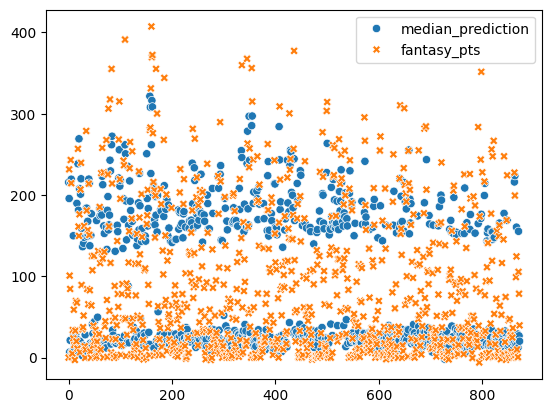

In [ ]:
import seaborn as sns
sns.scatterplot(data=test_df, x='fantasy_pts', y='median_prediction')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
#mean_squared_error(test_df['fantasy_pts'], test_df['median_prediction'])
r2_score(test_df['fantasy_pts'], test_df['median_prediction'])

0.4573524795570546